In [1]:
import numpy as np
import pandas as pd

src_path = "C:/Users/h1006/Documents/Research/Sun/Data/1_Kinematics/"

#src_name = ["Results1-5-116.csv", "Results1-54-109-20.csv", "Results2-125-215-20.csv", "Results2-160-210.csv",
#            "Results3-1-74-20.csv", "Results3-75-120.csv", "Results4-60-100.csv", "Results4-248-370-20.csv",
#            "Results5-1-100-20.csv", "Results6-380-485-20.csv", "Results7-250-310-20.csv", "Results8-1-105-20.csv",
#            "Results9-464-555-20.csv", "Results10-665-733-20.csv", "Results11-249-315-20.csv"]

# 20 points = the anterior edges of T3, and A1-A9
src_name = ["Results1-54-109-20.csv", "Results2-125-215-20.csv", "Results3-1-74-20.csv", "Results4-248-370-20.csv",
            "Results5-1-100-20.csv", "Results6-380-485-20.csv", "Results7-250-310-20.csv", "Results8-1-105-20.csv",
            "Results9-464-555-20.csv", "Results10-665-733-20.csv", "Results11-249-315-20.csv"]


src = []
for elem in src_name:
    src.append(pd.read_csv(src_path + elem))
    
print("Flie number:", len(src))
print("Frames:")
for i in range(len(src)):
    print("file{0:2d}: {1:d}".format(i, int(len(src[i])/20)))

Flie number: 11
Frames:
file 0: 56
file 1: 91
file 2: 74
file 3: 123
file 4: 100
file 5: 106
file 6: 61
file 7: 105
file 8: 92
file 9: 69
file10: 67


In [2]:
print(src[0].iloc[0])
print(src[0].iloc[0,1])
print(src[0].iloc[0,2])
print(src[0].iloc[18,1])
print(src[0].iloc[18,2])

                      1
X               434.242
Y                150.48
Slice                54
Unnamed: 4          NaN
Unnamed: 5    seg0_midx
Unnamed: 6      444.377
Name: 0, dtype: object
434.24199999999996
150.48
197.774
196.545


In [3]:
# xy coordinates of all

xy_all = []
label_num = 20

for src_dat in src:
    xy = []
    if len(src_dat)%label_num != 0:
        print("Invalid data.")
    else:
        for frame in range(len(src_dat)//label_num):
            xy0 = []
            for segment in range(label_num//2):
                xy00 = []
                xy00_LR = []
                xy00_LR.append([src_dat.iloc[frame*label_num + segment*2, 1],
                                src_dat.iloc[frame*label_num + segment*2, 2]] )
                xy00_LR.append([src_dat.iloc[frame*label_num + segment*2+1, 1],
                                src_dat.iloc[frame*label_num + segment*2+1, 2]] )
                xy0.append(xy00_LR)
            xy.append(xy0)
        xy = np.array(xy)
    xy_all.append(xy)

print("file:", len(xy_all))
print("frames:", len(xy_all[0]))
print("segments:", len(xy_all[0][0]))
print("LR:", len(xy_all[0][0][0]))
print("xy:", len(xy_all[0][0][0][0]))
print("shape of xy_all[0]:", xy_all[0].shape)

file: 11
frames: 56
segments: 10
LR: 2
xy: 2
shape of xy_all[0]: (56, 10, 2, 2)


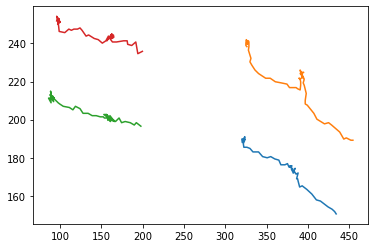

seg0_Right
x: 434.24199999999996
y: 150.48
seg0_Left
x: 454.51099999999997
y: 189.175
seg9_Right
x: 197.774
y: 196.545
seg9_Left
x: 199.61599999999999
y: 235.854
[444.3765 169.8275]
[198.695  216.1995]
Distance between seg0_mid and seg9_mid, pixel: 250.0195228902135 mm: 2.750214751792348


In [4]:
import matplotlib.pyplot as plt

file = 0
seg = 0 # 0: A9, 9: T3
LR = 0 # 0: right, 1: left
plt.plot(xy_all[0][:,seg,LR,0], xy_all[0][:,seg,LR,1])
plt.plot(xy_all[0][:,seg,LR+1,0], xy_all[0][:,seg,LR+1,1])
plt.plot(xy_all[0][:,seg+9,LR,0], xy_all[0][:,seg+9,LR,1])
plt.plot(xy_all[0][:,seg+9,LR+1,0], xy_all[0][:,seg+9,LR+1,1])
plt.show()

frame = 0
print("seg0_Right")
print("x:", xy_all[0][frame,seg,LR,0])
print("y:", xy_all[0][frame,seg,LR,1])
print("seg0_Left")
print("x:", xy_all[0][frame,seg,LR+1,0])
print("y:", xy_all[0][frame,seg,LR+1,1])
seg0_mid_x = (xy_all[0][frame,seg,LR,0] + xy_all[0][frame,seg,LR+1,0])/2
seg0_mid_y = (xy_all[0][frame,seg,LR,1] + xy_all[0][frame,seg,LR+1,1])/2

print("seg9_Right")
print("x:", xy_all[0][frame,seg+9,LR,0])
print("y:", xy_all[0][frame,seg+9,LR,1])
print("seg9_Left")
print("x:", xy_all[0][frame,seg+9,LR+1,0])
print("y:", xy_all[0][frame,seg+9,LR+1,1])

seg9_mid_x = (xy_all[0][frame,seg+9,LR,0] + xy_all[0][frame,seg+9,LR+1,0])/2
seg9_mid_y = (xy_all[0][frame,seg+9,LR,1] + xy_all[0][frame,seg+9,LR+1,1])/2


mm_per_pixel = 0.011
v0 = np.array([seg0_mid_x, seg0_mid_y])
v1 = np.array([seg9_mid_x, seg9_mid_y])
print(v0)
print(v1)
d = np.linalg.norm(v0-v1)
print("Distance between seg0_mid and seg9_mid, pixel:", d, "mm:", d*mm_per_pixel)

In [5]:
xy_all_mid = []
for i in range(len(xy_all)):
    xy_mid0 = []
    for frame in range(len(xy_all[i])):
        xy_mid00 = []
        for seg in range(len(xy_all[i][0])):
            midx = (xy_all[i][frame,seg,0,0] + xy_all[i][frame,seg,1,0])/2
            midy = (xy_all[i][frame,seg,0,1] + xy_all[i][frame,seg,1,1])/2
            xy_mid00.append([midx, midy])
        xy_mid0.append(xy_mid00)
    xy_mid0 = np.array(xy_mid0)
    xy_all_mid.append(xy_mid0)
print("file:", len(xy_all_mid))
print("xy_all_mid[0].shape (frame, seg, xy):", xy_all_mid[0].shape)

file: 11
xy_all_mid[0].shape (frame, seg, xy): (56, 10, 2)


In [6]:
initial_disp_all = []
for file_id in range(len(xy_all_mid)):
    initial_disp = []
    dat = xy_all_mid[file_id]
    for seg in range(10):
        v0 = dat[0,0,:]
        v1 = dat[0,seg,:]
        initial_disp.append(np.linalg.norm(v0-v1)*mm_per_pixel)
    initial_disp_all.append(initial_disp)
initial_disp_all = np.array(initial_disp_all)
print(initial_disp_all[:,-1])

[2.75021475 2.80903219 2.80012268 3.14081984 3.20833499 3.28546156
 3.16081372 3.2977763  3.55264693 3.11243426 3.33153275]


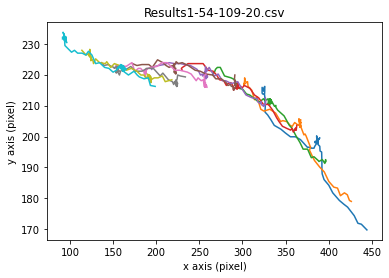

In [7]:
i = 0
for elm in range(10):
    plt.plot(xy_all_mid[i][:,elm,0], xy_all_mid[i][:,elm,1])
plt.title(src_name[i])
plt.xlabel("x axis (pixel)")
plt.ylabel("y axis (pixel)")
plt.show()

In [8]:
for i in range(len(xy_all_mid)):
    for elm in range(10):
        plt.plot(xy_all_mid[i][:,elm,0], xy_all_mid[i][:,elm,1])
    plt.title(src_name[i])
    plt.xlabel("x axis (pixel)")
    plt.ylabel("y axis (pixel)")
    plt.savefig(src_path + "img/201102_midpoint_plot_" + src_name[i] + ".png")
    plt.close()

In [9]:
print("file:", len(xy_all_mid))
print("xy_all_mid[0].shape (frame, seg, xy):", xy_all_mid[0].shape)

file: 11
xy_all_mid[0].shape (frame, seg, xy): (56, 10, 2)


In [10]:
# constants
mm_per_pixel = 0.011
sec_per_frame = 0.03333

initial_disp_all = []
disp_rel_all = []
disp_abs_all = []
seg_len_all = []
body_len_all = []

for file_id in range(len(xy_all_mid)):

    # initial position

    initial_disp = []
    dat = xy_all_mid[file_id]
    for seg in range(10):
        v0 = dat[0,0,:]
        v1 = dat[0,seg,:]
        initial_disp.append(np.linalg.norm(v0-v1)*mm_per_pixel)
    initial_disp_all.append(initial_disp)

    # displacement_rel

    disp_rel = []
    dat = xy_all_mid[file_id]
    for seg in range(10):
        disp_seg = []
        for frame in range(len(dat)):
            t = frame * sec_per_frame
            v0 = dat[0,seg,:]
            v1 = dat[frame,seg,:]
            disp_seg.append([t, np.linalg.norm(v0-v1)*mm_per_pixel])
        disp_rel.append(disp_seg)
    disp_rel = np.array(disp_rel)
    disp_rel_all.append(disp_rel)

    # displacement_abs

    disp_abs = []
    for seg in range(10):
        disp_abs0 = []
        for frame in range(len(disp_rel[0])):
            t = disp_rel[seg,frame,0]
            disp_abs00 = disp_rel[seg,frame,1] + initial_disp[seg]
            disp_abs0.append([t, disp_abs00])
        disp_abs.append(disp_abs0)
    disp_abs = np.array(disp_abs)
    disp_abs_all.append(disp_abs)

    # segment length

    seg_len = []
    dat = xy_all_mid[file_id]

    for seg in range(9):
        seg_len0 = []
        for frame in range(len(dat)):
            t = frame * sec_per_frame
            v0 = dat[frame,seg,:]
            v1 = dat[frame,seg+1,:]
            seg_len0.append([t, np.linalg.norm(v0-v1)*mm_per_pixel])
        seg_len.append(seg_len0)
    seg_len = np.array(seg_len)
    seg_len_all.append(seg_len)

    # body length
    
    body_len = []
    dat = xy_all_mid[file_id]
    
    for frame in range(len(dat)):
        t = frame * sec_per_frame
        v0 = dat[frame,0,:] # posterior end
        v1 = dat[frame,9,:] # anterior end
        body_len.append([t, np.linalg.norm(v0-v1)*mm_per_pixel])
    body_len_all.append(np.array(body_len))
    
print("len(initial_disp_all):", len(initial_disp_all))
print("len(initial_disp_all[0]) (seg number):", len(initial_disp_all[0]))
print("len(disp_rel_all):", len(disp_rel_all))
print("disp_rel_all[0].shape:", disp_rel_all[0].shape)
print("len(disp_abs_all):", len(disp_abs_all))
print("disp_abs_all[0].shape:", disp_abs_all[0].shape)
print("len(seg_len_all):", len(seg_len_all))
print("seg_len_all[0].shape:", seg_len_all[0].shape)
print("len(body_len_all):", len(body_len_all))
print("body_len_all[0].shape:", body_len_all[0].shape)

len(initial_disp_all): 11
len(initial_disp_all[0]) (seg number): 10
len(disp_rel_all): 11
disp_rel_all[0].shape: (10, 56, 2)
len(disp_abs_all): 11
disp_abs_all[0].shape: (10, 56, 2)
len(seg_len_all): 11
seg_len_all[0].shape: (9, 56, 2)
len(body_len_all): 11
body_len_all[0].shape: (56, 2)


In [11]:
print(initial_disp_all)

[[0.0, 0.22359935947862222, 0.5773429952480588, 0.9692658764948082, 1.3795665381046325, 1.7733360203258148, 2.1273042848859793, 2.3803578558260936, 2.546249111003134, 2.750214751792348], [0.0, 0.2230786738804274, 0.5464283827248082, 0.9268210390799565, 1.3312578773480555, 1.7202411243640383, 2.1074577385096593, 2.42506915739165, 2.623275426483559, 2.8090321894692662], [0.0, 0.2510038905325968, 0.5944321516853291, 1.0063354599263852, 1.4072837055315104, 1.807004543182031, 2.2049807106803674, 2.489752172930169, 2.6564115732974245, 2.800122679028769], [0.0, 0.29943462071210025, 0.7278943907863629, 1.1849826755959345, 1.6541930119309687, 2.038126648730765, 2.2950620983592693, 2.5509808715457862, 2.802999655710646, 3.1408198398734206], [0.0, 0.22981243049332686, 0.45615613831724283, 0.8314563807067682, 1.2346817454041539, 1.6895927991383, 2.106328129167972, 2.532776779549522, 2.8908122880056553, 3.2083349945680926], [0.0, 0.25606319851991655, 0.6487714396010359, 1.0714155323193943, 1.541859

In [12]:
for file_id in range(11):
    for seg in range(10):
        plt.plot(disp_abs_all[file_id][seg,:,0], disp_abs_all[file_id][seg,:,1])
    plt.title("Displacement of file {0}".format(src_name[file_id]))
    plt.xlabel("Time (sec)")
    plt.ylabel("Displacement (mm)")
    plt.xlim([0,4.2])
    plt.ylim([0,6.2])
    plt.xticks([0,1,2,3,4])
    plt.savefig(src_path + "img/201102_displacement_plot_" + src_name[file_id] + ".png")
    plt.close()

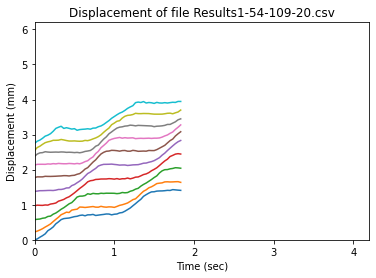

In [13]:
file_id = 0
for seg in range(10):
    plt.plot(disp_abs_all[file_id][seg,:,0], disp_abs_all[file_id][seg,:,1])
plt.title("Displacement of file {0}".format(src_name[file_id]))
plt.xlabel("Time (sec)")
plt.ylabel("Displacement (mm)")
plt.xlim([0,4.2])
plt.ylim([0,6.2])
plt.xticks([0,1,2,3,4])
plt.show()

In [14]:
for file_id in range(11):
    plt.figure(figsize = (10,6))
    for seg in range(9):
        plt.plot(seg_len_all[file_id][seg,:,0], seg_len_all[file_id][seg,:,1])
    plt.title("Segment length of file {0}".format(src_name[file_id]))
    plt.xlabel("Time (sec)")
    plt.ylabel("Segment length (mm)")
    plt.xlim([0,4.2])
    plt.ylim([0,0.6])
    plt.xticks([0,1,2,3,4])
    plt.savefig(src_path + "img/201102_segment_length_plot_" + src_name[file_id] + ".png")
    plt.close()

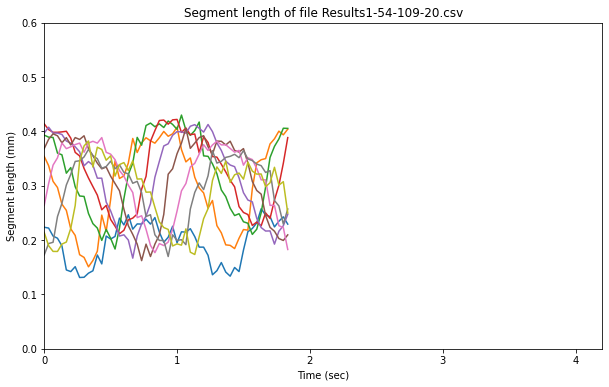

In [15]:
file_id = 0
plt.figure(figsize = (10,6))
for seg in range(9):
    plt.plot(seg_len_all[file_id][seg,:,0], seg_len_all[file_id][seg,:,1])
plt.title("Segment length of file {0}".format(src_name[file_id]))
plt.xlabel("Time (sec)")
plt.ylabel("Segment length (mm)")
plt.xlim([0,4.2])
plt.ylim([0,0.6])
plt.xticks([0,1,2,3,4])
plt.show()

In [16]:
import matplotlib.pyplot as plt

src_path = "C:/Users/h1006/Documents/Research/Sun/Data/1_Kinematics/"

for file_id in range(len(body_len_all)):
    plt.figure(figsize = (10,6))
    plt.plot(body_len_all[file_id][:,0], body_len_all[file_id][:,1])
    plt.title("Body length of file {0}".format(src_name[file_id]))
    plt.xlabel("Time (sec)")
    plt.ylabel("Segment length (mm)")
    plt.xlim([0,4.2])
    plt.ylim([2,4])
    plt.xticks([0,1,2,3,4])
    plt.savefig(src_path + "img/201104_body_length_plot_" + src_name[file_id] + ".png")
    plt.close()

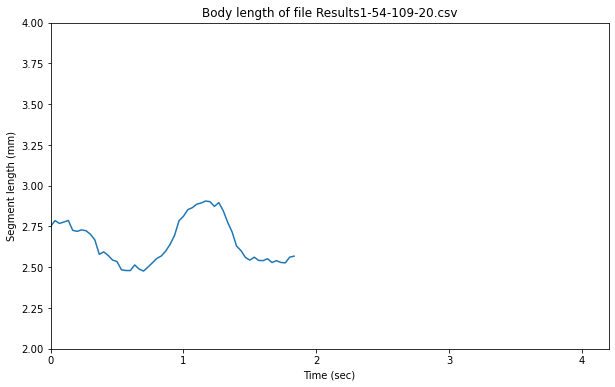

In [17]:
import matplotlib.pyplot as plt

file_id = 0
plt.figure(figsize = (10,6))
plt.plot(body_len_all[file_id][:,0], body_len_all[file_id][:,1])
plt.title("Body length of file {0}".format(src_name[file_id]))
plt.xlabel("Time (sec)")
plt.ylabel("Segment length (mm)")
plt.xlim([0,4.2])
plt.ylim([2,4])
plt.xticks([0,1,2,3,4])
plt.show()

# Parameter extraction

In [18]:
# Stride length and stride duration

print("len(disp_abs_all):", len(disp_abs_all))
print("disp_abs_all[0].shape:", disp_abs_all[0].shape)

len(disp_abs_all): 11
disp_abs_all[0].shape: (10, 56, 2)


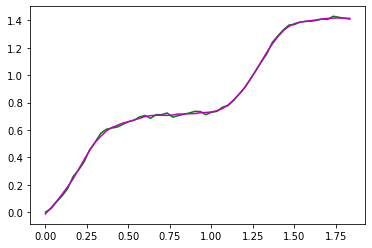

In [19]:
import copy
from scipy import signal

disp_abs_all_savgol = copy.deepcopy(disp_abs_all)
file_id = 0
seg = 0
disp_abs_all_savgol[file_id][seg][:,1] = signal.savgol_filter(disp_abs_all[file_id][seg][:,1], 11,2)

plt.figure()
plt.plot(disp_abs_all[file_id][seg,:,0], disp_abs_all[file_id][seg,:,1], color='g')
plt.plot(disp_abs_all_savgol[file_id][seg,:,0], disp_abs_all_savgol[file_id][seg,:,1], color='m')
plt.show()

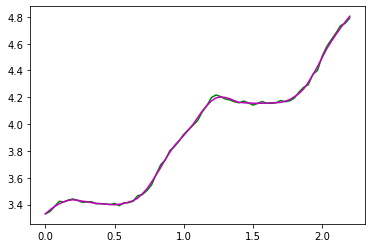

In [20]:
import copy
from scipy import signal

disp_abs_all_savgol = copy.deepcopy(disp_abs_all)

for file_id in range(len(disp_abs_all)):
    savgol0 = []
    for seg in range(len(disp_abs_all[0])):
        disp_abs_all_savgol[file_id][seg][:,1] = signal.savgol_filter(disp_abs_all[file_id][seg][:,1], 11,2)
plt.figure()
plt.plot(disp_abs_all[file_id][seg,:,0], disp_abs_all[file_id][seg,:,1], color='g')
plt.plot(disp_abs_all_savgol[file_id][seg,:,0], disp_abs_all_savgol[file_id][seg,:,1], color='m')
plt.show()

In [21]:
import peakutils
from scipy.signal import argrelmax

xmin = 0
xmax = 6
bins = 120
width = (xmax-xmin)/bins

stride_all = []

for file_id in range(len(disp_abs_all)):
    stride_seg = []
    for seg in range(10):
        stride_seg0 = []
        hist_dat = np.histogram(disp_abs_all_savgol[file_id][seg,:,1], bins=120,range=(0,6))
        #peaks = hist_dat[1][argrelmax(hist_dat[0], order=4)]
        peaks_id = peakutils.indexes(hist_dat[0], thres=0.2, min_dist=5)
        peaks_id = np.sort(peaks_id)
        peaks = hist_dat[1][peaks_id]
        for peak_id in range(len(peaks)):
            dat0 = disp_abs_all[file_id][seg]
            disp_peak = [dat0[i,1] for i in range(len(dat0)) 
                         if dat0[i,1] > peaks[peak_id] and dat0[i,1] < peaks[peak_id] + width]
            time_peak = [dat0[i,0] for i in range(len(dat0)) 
                         if dat0[i,1] > peaks[peak_id] and dat0[i,1] < peaks[peak_id] + width]
            disp_peak_med = np.median(disp_peak)
            time_peak_med = np.median(time_peak)
            stride_seg0.append([time_peak_med, disp_peak_med])
        stride_seg.append(np.array(stride_seg0))

    stride_all.append(stride_seg)

    plt.figure()
    for seg in range(10):
        plt.plot(disp_abs_all[file_id][seg,:,0], disp_abs_all[file_id][seg,:,1])
        plt.plot(stride_all[file_id][seg][:,0], stride_all[file_id][seg][:,1], 'o')

    plt.title("Displacement of file {0}".format(src_name[file_id]))
    plt.xlabel("Time (sec)")
    plt.ylabel("Displacement (mm)")
    plt.xlim([0,4.2])
    plt.ylim([0,6.2])
    plt.xticks([0,1,2,3,4])
    plt.savefig(src_path + "img/201102_stride_length_detection_" + src_name[file_id] + ".png")
    plt.close()


In [22]:
import pickle

with open(src_path + "pickle/initial_disp_all_201102.pickle", "wb") as f1:
    pickle.dump(initial_disp_all, f1)
with open(src_path + "pickle/disp_rel_all_201102.pickle", "wb") as f2:
    pickle.dump(disp_rel_all, f2)
with open(src_path + "pickle/disp_abs_all_201102.pickle", "wb") as f3:
    pickle.dump(disp_abs_all, f3)
with open(src_path + "pickle/seg_len_all_201102.pickle", "wb") as f4:
    pickle.dump(seg_len_all, f4)
with open(src_path + "pickle/stride_all_201102.pickle", "wb") as f5:
    pickle.dump(stride_all, f5)
with open(src_path + "pickle/body_len_all_201104.pickle", "wb") as f6:
    pickle.dump(body_len_all, f6)

In [23]:
print("len(initial_disp_all):", len(initial_disp_all))
print("len(initial_disp_all[0]) (seg number):", len(initial_disp_all[0]))
print("len(disp_rel_all):", len(disp_rel_all))
print("disp_rel_all[0].shape:", disp_rel_all[0].shape)
print("len(disp_abs_all):", len(disp_abs_all))
print("disp_abs_all[0].shape:", disp_abs_all[0].shape)
print("len(seg_len_all):", len(seg_len_all))
print("seg_len_all[0].shape:", seg_len_all[0].shape)
print("len(stride_all)(movie number):", len(stride_all))
print("len(stride_all[0])(seg number):", len(stride_all[0]))
print("len(stride_all[0][0])(peak number):", len(stride_all[0][0]))
print("len(stride_all[0][0][0])(time, displacement):", len(stride_all[0][0][0]))

len(initial_disp_all): 11
len(initial_disp_all[0]) (seg number): 10
len(disp_rel_all): 11
disp_rel_all[0].shape: (10, 56, 2)
len(disp_abs_all): 11
disp_abs_all[0].shape: (10, 56, 2)
len(seg_len_all): 11
seg_len_all[0].shape: (9, 56, 2)
len(stride_all)(movie number): 11
len(stride_all[0])(seg number): 10
len(stride_all[0][0])(peak number): 2
len(stride_all[0][0][0])(time, displacement): 2


In [24]:
import pickle

src_path = "C:/Users/h1006/Documents/Research/Sun/Data/1_Kinematics/"

with open(src_path + "pickle/stride_all_201102.pickle", "rb") as f5:
    stride_all = pickle.load(f5)

In [25]:
import numpy as np

stride_length_all = []
for mov_id in range(len(stride_all)):
    dst1 = []
    for seg_id in range(10):
        dat_stride = stride_all[mov_id][seg_id]
        dst0 = []
        for i in range(len(dat_stride)-1):
            dst0.append(dat_stride[i+1,1]-dat_stride[i,1])
        dst1.append(np.median(dst0))
    stride_length_all.append(dst1)
print(stride_length_all)

[[0.6911924962899594, 0.6919708751678539, 0.7220980959696078, 0.7489331914225484, 0.7262781951747381, 0.7121084927849997, 0.725317340142472, 0.7690803304916778, 0.7601284630539773, 0.7423975493033774], [0.7243578673624755, 0.7040242359907471, 0.5588638051751833, 0.54303724894798, 0.7365530152809071, 0.7524941406039366, 0.7562378468986575, 0.7589913040482938, 0.7683735130055431, 0.7647331529866126], [0.7638177303457273, 0.7812880756887456, 0.5513965700671024, 0.6797462177366717, 0.6827611771711533, 0.6789696612975935, 0.6757636632697168, 0.6493251315836592, 0.6495614323120988, 0.6278338521645455], [0.6298624571029399, 0.600858184125618, 0.6927980778262661, 0.6928475389645223, 0.6891729905099142, 0.6792435969835195, 0.681014412675073, 0.6763933574184153, 0.6478991250733683, 0.6495949721786616], [0.7379154009077686, 0.7524459817038709, 0.7548183390025156, 0.7691113269483887, 0.7689950430796604, 0.7430074576562662, 0.7509369807907023, 0.732285491104697, 0.7506894130006461, 0.76258291081197

In [26]:
import pickle

src_path = "C:/Users/h1006/Documents/Research/Sun/Data/1_Kinematics/"

with open(src_path + "pickle/stride_length_all_201104.pickle", "wb") as f7:
    pickle.dump(stride_length_all, f7)

In [27]:
import numpy as np
import pickle

src_path = "C:/Users/h1006/Documents/Research/Sun/Data/1_Kinematics/"

with open(src_path + "pickle/stride_length_all_201104.pickle", "rb") as f6:
    stride_length_all = np.array(pickle.load(f6))

In [28]:
print("stride_length_all.shape", stride_length_all.shape)

stride_length_all.shape (11, 10)


In [29]:
stride_len_med = []
for i in range(len(stride_length_all)):
    stride_len_med.append(np.median(stride_length_all[i]))
    print("median stride length of movie{0}: {1:3f}".format(i, np.median(stride_length_all[i])))

median stride length of movie0: 0.725798
median stride length of movie1: 0.744524
median stride length of movie2: 0.677367
median stride length of movie3: 0.677818
median stride length of movie4: 0.751691
median stride length of movie5: 0.787025
median stride length of movie6: 0.798117
median stride length of movie7: 0.631752
median stride length of movie8: 0.703024
median stride length of movie9: 0.706482
median stride length of movie10: 0.696349


In [30]:
with open(src_path + "pickle/body_len_all_201104.pickle", "rb") as f6:
    body_len_all = pickle.load(f6)

In [31]:
body_len_max = []

for file_id in range(len(body_len_all)):
    body_len_max.append(body_len_all[file_id][:,1].max())
        
print("body_len_max:", body_len_max)
print("stride_length_med:", stride_len_med)


body_len_max: [2.9060666772957906, 2.865987481121035, 2.89964021516403, 3.5829399300064315, 3.4107561719472486, 3.4504843320582195, 3.251682577404581, 3.4507534626365293, 3.7120708042955277, 3.2801522383540753, 3.3908765664837315]
stride_length_med: [0.725797767658605, 0.7445235779424219, 0.6773666622836552, 0.6778184772009674, 0.7516914812472866, 0.787025120850095, 0.7981169074787006, 0.6317520883196279, 0.7030244993145678, 0.7064823336504378, 0.6963489605737413]


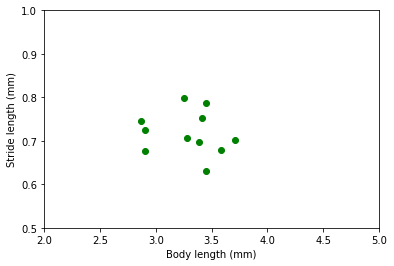

Body length average (mm):3.29±0.09
Stride length average (mm):0.72±0.01


In [32]:
import matplotlib.pyplot as plt
from scipy import stats

plt.plot(body_len_max, stride_len_med, 'go')
plt.xlim([2,5])
plt.xlabel("Body length (mm)")
plt.ylim([0.5,1.0])
plt.ylabel("Stride length (mm)")
plt.show()

print("Body length average (mm):{0:4.2f}±{1:4.2f}".format(np.mean(body_len_max), stats.sem(body_len_max)))
print("Stride length average (mm):{0:4.2f}±{1:4.2f}".format(np.mean(stride_len_med), stats.sem(stride_len_med)))

In [33]:
print("len(seg_len_all):", len(seg_len_all))
print("seg_len_all[0].shape: (seg, frame, time/length)", seg_len_all[0].shape)

len(seg_len_all): 11
seg_len_all[0].shape: (seg, frame, time/length) (9, 56, 2)


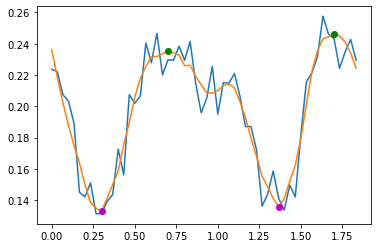

In [34]:
import copy
import matplotlib.pyplot as plt
import peakutils
from scipy import signal

seg_len_savgol = []
seg_len_peaks = []

for file_id in range(len(seg_len_all)):
    seg_len_savgol0 = []
    seg_len_peaks0 = []
    for seg in range(len(seg_len_all[file_id])):
        dat = seg_len_all[file_id][seg]
        dat_savgol = copy.deepcopy(dat)
        dat_savgol[:,1] = signal.savgol_filter(dat[:,1],11,2)
        peaks_id_p = peakutils.indexes(dat_savgol[:,1], thres=0.2, min_dist=20)
        peaks_id_n = peakutils.indexes(-dat_savgol[:,1], thres=0.2, min_dist=20)
        seg_len_savgol0.append(dat_savgol)
        seg_len_peaks0.append([peaks_id_p, peaks_id_n])
    seg_len_savgol.append(seg_len_savgol0)
    seg_len_peaks.append(seg_len_peaks0)
    
file_id = 0
seg = 0
dat_src = seg_len_all[file_id][seg]
dat_sav = seg_len_savgol[file_id][seg]
dat_peaks = seg_len_peaks[file_id][seg]
plt.plot(dat_src[:,0], dat_src[:,1])
plt.plot(dat_sav[:,0], dat_sav[:,1])
plt.plot(dat_sav[dat_peaks[0],0], dat_sav[dat_peaks[0],1], 'go')
plt.plot(dat_sav[dat_peaks[1],0], dat_sav[dat_peaks[1],1], 'mo')
plt.savefig(src_path + "img/201104_segment_length_{0}_seg{1}.png".format(src_name[file_id], seg))
plt.show()

In [35]:
seg_len_range_all = []

for file_id in range(len(seg_len_all)):
    dst = []
    for seg in range(len(seg_len_all[file_id])):
        dat_src = seg_len_all[file_id][seg]
        dat_sav = seg_len_savgol[file_id][seg]
        dat_peaks = seg_len_peaks[file_id][seg]

        dst_p = [dat_sav[dat_peaks[0],0], dat_sav[dat_peaks[0],1]]
        dst_n = [dat_sav[dat_peaks[1],0], dat_sav[dat_peaks[1],1]]
        dst.append([dst_p, dst_n])
        
        plt.plot(dat_src[:,0], dat_src[:,1])
        plt.plot(dat_sav[:,0], dat_sav[:,1])
        plt.plot(dat_sav[dat_peaks[0],0], dat_sav[dat_peaks[0],1], 'go')
        plt.plot(dat_sav[dat_peaks[1],0], dat_sav[dat_peaks[1],1], 'mo')
        plt.savefig(src_path + "img/201104_segment_length_{0}_seg{1}.png".format(src_name[file_id], seg))
        plt.close()
    seg_len_range_all.append(dst)

In [36]:
import pickle

with open(src_path + "pickle/seg_len_range_all_201104.pickle", "wb") as f:
    pickle.dump(seg_len_range_all, f)

In [37]:
import pickle

with open(src_path + "pickle/seg_len_range_all_201104.pickle", "rb") as f:
    seg_len_range_all = pickle.load(f)

In [38]:
print("len(seg_len_range_all) (file_id):", len(seg_len_range_all))
print("len(seg_len_range_all[0])(seg):", len(seg_len_range_all[0]))
print("len(seg_len_range_all[0][0])(peak/valley)", len(seg_len_range_all[0][0]))
print("len(seg_len_range_all[0][0][0])(time/length)", len(seg_len_range_all[0][0][0]))

file_id = 0
seg_id = 0
peak = 0
valley = 1
print("seg_len_range_all[file_id][seg][peak]:(time/length)", seg_len_range_all[file_id][seg_id][peak])
print("seg_len_range_all[file_id][seg][valley]:(time/length)", seg_len_range_all[file_id][seg_id][valley])

len(seg_len_range_all) (file_id): 11
len(seg_len_range_all[0])(seg): 9
len(seg_len_range_all[0][0])(peak/valley) 2
len(seg_len_range_all[0][0][0])(time/length) 2
seg_len_range_all[file_id][seg][peak]:(time/length) [array([0.69993, 1.69983]), array([0.235319  , 0.24612954])]
seg_len_range_all[file_id][seg][valley]:(time/length) [array([0.29997, 1.36653]), array([0.13288642, 0.13586834])]


estimated delay is 10
[10 42]


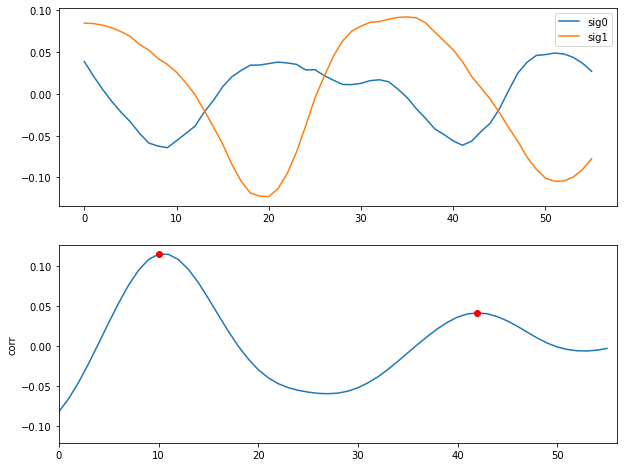

111


In [39]:
import numpy as np
import peakutils

# signal:

seg0 = 0
seg1 = 4

sig0 = seg_len_savgol[0][seg0][:,1]
sig1 = seg_len_savgol[0][seg1][:,1]

# centralization
sig0 = sig0 - sig0.mean()
sig1 = sig1 - sig1.mean()
corr = np.correlate(sig1, sig0, "full")
peaks_id = peakutils.indexes(corr[len(corr)-len(sig0):], thres=0.2, min_dist=20)
estimated_delay = peaks_id[0]
print("estimated delay is {}".format(estimated_delay))
print(peaks_id)

fig, ax = plt.subplots(2,1, figsize = (10,8))
ax[0].plot(sig0, label="sig0")
ax[0].plot(sig1, label="sig1")
ax[0].legend()
ax[1].set_ylabel("corr")
ax[1].plot(np.arange(len(corr))-len(sig0)+1, corr)
ax[1].plot(peaks_id, corr[peaks_id+len(sig0)-1], 'ro')
ax[1].set_xlim([0, len(sig1)])
plt.show()
print(len(corr))

In [40]:
import numpy as np
import peakutils

fig_path = "C:/Users/h1006/Documents/Research/Sun/Data/1_Kinematics/img/correlation/"

# segmental delay
seg_len_delay_all = []

for file_id in range(len(seg_len_savgol)):
    dst0 = []
    for seg_id in range(len(seg_len_savgol[file_id])-1):

        sig0 = seg_len_savgol[file_id][seg_id][:,1]
        sig1 = seg_len_savgol[file_id][seg_id+1][:,1]

        # centralization
        sig0 = sig0 - sig0.mean()
        sig1 = sig1 - sig1.mean()
        corr = np.correlate(sig1, sig0, "full")
        t_margin = 2
        peaks_id = peakutils.indexes(corr[len(corr)-len(sig0)-t_margin:], thres=0.2, min_dist=20)
        peaks_id = peaks_id - t_margin
        estimated_delay = peaks_id[0]
        dst0.append(estimated_delay)
        
        fig, ax = plt.subplots(2,1, figsize = (10,8))
        ax[0].plot(sig0, label="sig0")
        ax[0].plot(sig1, label="sig1")
        ax[0].legend()
        ax[1].set_ylabel("corr")
        ax[1].plot(np.arange(len(corr))-len(sig0)+1, corr)
        ax[1].plot(peaks_id, corr[peaks_id+len(sig0)-1], 'ro')
        ax[1].set_xlim([0, len(sig1)])
        plt.savefig(fig_path + "intersegmental_corr_{0}_seg{1}.png".format(src_name[file_id], seg_id))
        plt.close()
    seg_len_delay_all.append(dst0)
        
# stride duration
stride_duration_all = []

for file_id in range(len(seg_len_savgol)):
    dst0 = []
    for seg_id in range(len(seg_len_savgol[file_id])):

        sig0 = seg_len_savgol[file_id][seg_id][:,1]
        sig1 = seg_len_savgol[file_id][seg_id][:,1]

        # centralization
        sig0 = sig0 - sig0.mean()
        sig1 = sig1 - sig1.mean()
        corr = np.correlate(sig1, sig0, "full")
        peaks_id = peakutils.indexes(corr[len(corr)-len(sig0):], thres=0.2, min_dist=20)
        estimated_delay = peaks_id[0]
        dst0.append(estimated_delay)
        
        fig, ax = plt.subplots(2,1, figsize = (10,8))
        ax[0].plot(sig0, label="sig0")
        ax[0].plot(sig1, label="sig1")
        ax[0].legend()
        ax[1].set_ylabel("corr")
        ax[1].plot(np.arange(len(corr))-len(sig0)+1, corr)
        ax[1].plot(peaks_id, corr[peaks_id+len(sig0)-1], 'ro')
        ax[1].set_xlim([0, len(sig1)])
        plt.savefig(fig_path + "auto_corr_{0}_seg{1}.png".format(src_name[file_id], seg_id))
        plt.close()
    stride_duration_all.append(dst0)

In [41]:
import pickle

src_path = "C:/Users/h1006/Documents/Research/Sun/Data/1_Kinematics/"

with open(src_path + "pickle/seg_len_delay_all_201104.pickle", "wb") as f8:
    pickle.dump(seg_len_delay_all, f8)
with open(src_path + "pickle/stride_duration_all_201104.pickle", "wb") as f9:
    pickle.dump(stride_duration_all, f9)

In [42]:
import pickle

with open(src_path + "pickle/seg_len_delay_all_201104.pickle", "rb") as f8:
    seg_len_delay_all = pickle.load(f8)
with open(src_path + "pickle/stride_duration_all_201104.pickle", "rb") as f9:
    stride_duration_all = pickle.load(f9)

In [49]:
print("From cross-correlation")
print("len(seg_len_delay_all):", len(seg_len_delay_all))
print("len(seg_len_delay_all[0])(seg):", len(seg_len_delay_all[0]))
print("seg_len_delay_all[0]:", seg_len_delay_all[0])

print("From auto-correlation")
print("len(stride_duration_all):", len(stride_duration_all))
print("len(stride_duration_all[0])(seg):", len(stride_duration_all[0]))
print("stride_duration_all[0]:", stride_duration_all[0])

From cross-correlation
len(seg_len_delay_all): 11
len(seg_len_delay_all[0])(seg): 8
seg_len_delay_all[0]: [1, 3, 3, 2, 3, 3, 2, 2]
From auto-correlation
len(stride_duration_all): 11
len(stride_duration_all[0])(seg): 9
stride_duration_all[0]: [31, 31, 31, 30, 31, 30, 29, 28, 30]


In [2]:
# boundary stride duration 201119

import pickle

src_path = "C:/Users/h1006/Documents/Research/Sun/Data/1_Kinematics/"

with open(src_path + "pickle/disp_abs_all_201102.pickle", "rb") as f:
    disp_abs_all = pickle.load(f)

In [3]:
import copy
from scipy import signal

disp_abs_all_savgol = copy.deepcopy(disp_abs_all)

for file_id in range(len(disp_abs_all)):
    savgol0 = []
    for seg in range(len(disp_abs_all[0])):
        disp_abs_all_savgol[file_id][seg][:,1] = signal.savgol_filter(disp_abs_all[file_id][seg][:,1], 11,2)

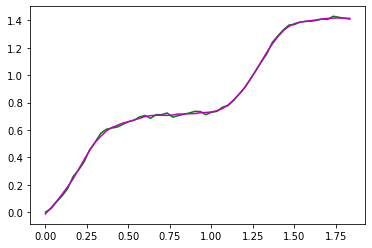

In [4]:
import matplotlib.pyplot as plt

file_id = 0
seg = 0

plt.figure()
plt.plot(disp_abs_all[file_id][seg,:,0], disp_abs_all[file_id][seg,:,1], color='g')
plt.plot(disp_abs_all_savgol[file_id][seg,:,0], disp_abs_all_savgol[file_id][seg,:,1], color='m')
plt.show()

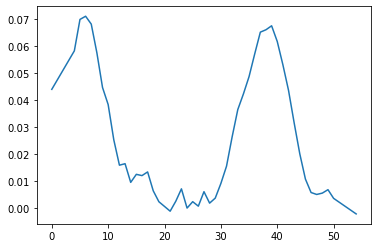

In [5]:
import numpy as np

diff = np.diff(disp_abs_all_savgol[file_id][seg,:,1])

plt.plot(diff)
plt.show()

estimated delay is 32
[32]


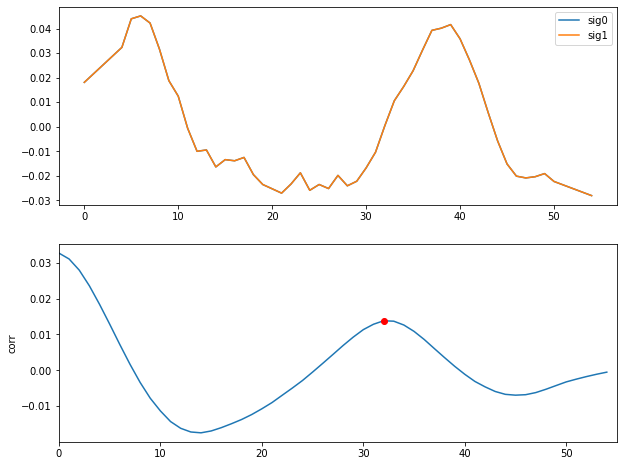

109


In [6]:
import numpy as np
import peakutils

# signal:

sig0 = diff
sig1 = diff

# centralization
sig0 = sig0 - sig0.mean()
sig1 = sig1 - sig1.mean()
corr = np.correlate(sig1, sig0, "full")
peaks_id = peakutils.indexes(corr[len(corr)-len(sig0):], thres=0.2, min_dist=20)
estimated_delay = peaks_id[0]
print("estimated delay is {}".format(estimated_delay))
print(peaks_id)

fig, ax = plt.subplots(2,1, figsize = (10,8))
ax[0].plot(sig0, label="sig0")
ax[0].plot(sig1, label="sig1")
ax[0].legend()
ax[1].set_ylabel("corr")
ax[1].plot(np.arange(len(corr))-len(sig0)+1, corr)
ax[1].plot(peaks_id, corr[peaks_id+len(sig0)-1], 'ro')
ax[1].set_xlim([0, len(sig1)])
plt.show()
print(len(corr))

In [7]:
import copy
from scipy import signal

disp_abs_all_savgol = copy.deepcopy(disp_abs_all)

for file_id in range(len(disp_abs_all)):
    savgol0 = []
    for seg in range(len(disp_abs_all[0])):
        disp_abs_all_savgol[file_id][seg][:,1] = signal.savgol_filter(disp_abs_all[file_id][seg][:,1], 11,2)

In [ ]:
import numpy as np

diff = np.diff(disp_abs_all_savgol[file_id][seg,:,1])

plt.plot(diff)
plt.show()

In [13]:
import numpy as np
import peakutils

# source: disp_abs_all_savgol
fig_path = "C:/Users/h1006/Documents/Research/Sun/Data/1_Kinematics/img/correlation/"
src_name = ["Results1-54-109-20.csv", "Results2-125-215-20.csv", "Results3-1-74-20.csv", "Results4-248-370-20.csv",
            "Results5-1-100-20.csv", "Results6-380-485-20.csv", "Results7-250-310-20.csv", "Results8-1-105-20.csv",
            "Results9-464-555-20.csv", "Results10-665-733-20.csv", "Results11-249-315-20.csv"]

# bounday motion delay
boundary_motion_delay_all = []

for file_id in range(len(disp_abs_all_savgol)):
    dst0 = []
    for seg_id in range(len(disp_abs_all_savgol[file_id])-1):

        sig0 = np.diff(disp_abs_all_savgol[file_id][seg_id][:,1])
        sig1 = np.diff(disp_abs_all_savgol[file_id][seg_id+1][:,1])

        # centralization
        sig0 = sig0 - sig0.mean()
        sig1 = sig1 - sig1.mean()
        corr = np.correlate(sig1, sig0, "full")
        t_margin = 2
        peaks_id = peakutils.indexes(corr[len(corr)-len(sig0)-t_margin:], thres=0.2, min_dist=20)
        peaks_id = peaks_id - t_margin
        estimated_delay = peaks_id[0]
        dst0.append(estimated_delay)
        
        fig, ax = plt.subplots(2,1, figsize = (10,8))
        ax[0].plot(sig0, label="sig0")
        ax[0].plot(sig1, label="sig1")
        ax[0].legend()
        ax[1].set_ylabel("corr")
        ax[1].plot(np.arange(len(corr))-len(sig0)+1, corr)
        ax[1].plot(peaks_id, corr[peaks_id+len(sig0)-1], 'ro')
        ax[1].set_xlim([0, len(sig1)])
        plt.savefig(fig_path + "201119_boundary_motion_interseg_corr_{0}_seg{1}.png".format(src_name[file_id], seg_id))
        plt.close()
    boundary_motion_delay_all.append(dst0)
        
# boundary stride duration
boundary_stride_duration_all = []

for file_id in range(len(disp_abs_all_savgol)):
    dst0 = []
    for seg_id in range(len(disp_abs_all_savgol[file_id])):

        sig0 = np.diff(disp_abs_all_savgol[file_id][seg_id][:,1])
        sig1 = np.diff(disp_abs_all_savgol[file_id][seg_id][:,1])

        # centralization
        sig0 = sig0 - sig0.mean()
        sig1 = sig1 - sig1.mean()
        corr = np.correlate(sig1, sig0, "full")
        peaks_id = peakutils.indexes(corr[len(corr)-len(sig0):], thres=0.2, min_dist=20)
        estimated_delay = peaks_id[0]
        dst0.append(estimated_delay)
        
        fig, ax = plt.subplots(2,1, figsize = (10,8))
        ax[0].plot(sig0, label="sig0")
        ax[0].plot(sig1, label="sig1")
        ax[0].legend()
        ax[1].set_ylabel("corr")
        ax[1].plot(np.arange(len(corr))-len(sig0)+1, corr)
        ax[1].plot(peaks_id, corr[peaks_id+len(sig0)-1], 'ro')
        ax[1].set_xlim([0, len(sig1)])
        plt.savefig(fig_path + "201119_boundary_auto_corr_{0}_seg{1}.png".format(src_name[file_id], seg_id))
        plt.close()
    boundary_stride_duration_all.append(dst0)

In [14]:
import pickle

src_path = "C:/Users/h1006/Documents/Research/Sun/Data/1_Kinematics/"

with open(src_path + "pickle/boundary_motion_delay_all_201119.pickle", "wb") as f1:
    pickle.dump(boundary_motion_delay_all, f1)
with open(src_path + "pickle/boundary_stride_duration_all_201119.pickle", "wb") as f2:
    pickle.dump(boundary_stride_duration_all, f2)

In [17]:
boundary_stride_duration_all = np.array(boundary_stride_duration_all)
print("boundary_stride_duration_all", boundary_stride_duration_all.shape)
print(boundary_stride_duration_all)

boundary_stride_duration_all (11, 10)
[[32 32 31 31 31 30 29 28 29 29]
 [31 31 31 31 31 32 32 31 31 31]
 [35 36 34 33 33 33 33 33 32 32]
 [27 27 27 27 27 27 28 27 27 27]
 [30 30 31 30 31 31 31 30 31 30]
 [41 40 40 41 41 40 41 42 42 39]
 [25 25 25 25 24 24 24 24 25 25]
 [35 35 36 36 35 35 36 36 35 34]
 [34 35 35 34 34 35 35 35 35 35]
 [27 28 28 28 28 28 29 28 28 29]
 [30 33 33 33 33 33 33 33 34 33]]


In [18]:
boundary_motion_delay_all = np.array(boundary_motion_delay_all)
print("boundary_motion_delay_all", boundary_motion_delay_all.shape)
print(boundary_motion_delay_all)

boundary_motion_delay_all (11, 9)
[[1 4 3 3 2 2 2 2 2]
 [0 5 5 3 3 2 2 2 3]
 [0 5 3 3 3 3 2 3 2]
 [0 2 3 3 3 3 2 2 1]
 [1 3 3 3 3 2 2 2 2]
 [0 5 5 4 3 3 3 2 1]
 [0 3 2 2 2 2 2 1 1]
 [0 4 4 3 3 3 3 2 1]
 [1 3 4 4 4 3 2 1 1]
 [1 3 3 2 3 3 3 2 2]
 [1 3 2 2 3 2 2 2 1]]


In [1]:
# Calculate speed

import copy
from scipy import signal
import pickle

src_path = "C:/Users/h1006/Documents/Research/Sun/Data/1_Kinematics/"

with open(src_path + "pickle/disp_abs_all_201102.pickle", "rb") as f:
    disp_abs_all = pickle.load(f)

disp_abs_all_savgol = copy.deepcopy(disp_abs_all)

for file_id in range(len(disp_abs_all)):
    savgol0 = []
    for seg in range(len(disp_abs_all[0])):
        disp_abs_all_savgol[file_id][seg][:,1] = signal.savgol_filter(disp_abs_all[file_id][seg][:,1], 11,2)

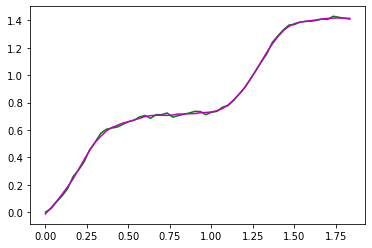

In [2]:
import matplotlib.pyplot as plt

file_id = 0
seg = 0

plt.figure()
plt.plot(disp_abs_all[file_id][seg,:,0], disp_abs_all[file_id][seg,:,1], color='g')
plt.plot(disp_abs_all_savgol[file_id][seg,:,0], disp_abs_all_savgol[file_id][seg,:,1], color='m')
plt.show()

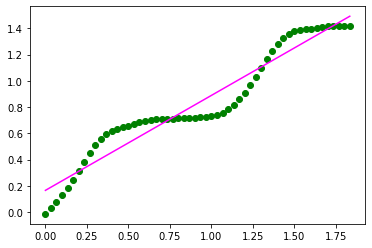

coefficient: [0.72358412]


In [15]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

file_id = 0
seg = 0

X = disp_abs_all_savgol[file_id][seg,:,0].reshape(-1,1)
Y = disp_abs_all_savgol[file_id][seg,:,1].reshape(-1,1)
lr.fit(X, Y)

plt.scatter(X, Y, color='green')
plt.plot(X, lr.predict(X), color='magenta')
plt.show()

print("coefficient:", lr.coef_[0])

In [27]:
print(X)
print(Y)
print(Y.reshape(-1,1))

[[0.     ]
 [0.03333]
 [0.06666]
 [0.09999]
 [0.13332]
 [0.16665]
 [0.19998]
 [0.23331]
 [0.26664]
 [0.29997]
 [0.3333 ]
 [0.36663]
 [0.39996]
 [0.43329]
 [0.46662]
 [0.49995]
 [0.53328]
 [0.56661]
 [0.59994]
 [0.63327]
 [0.6666 ]
 [0.69993]
 [0.73326]
 [0.76659]
 [0.79992]
 [0.83325]
 [0.86658]
 [0.89991]
 [0.93324]
 [0.96657]
 [0.9999 ]
 [1.03323]
 [1.06656]
 [1.09989]
 [1.13322]
 [1.16655]
 [1.19988]
 [1.23321]
 [1.26654]
 [1.29987]
 [1.3332 ]
 [1.36653]
 [1.39986]
 [1.43319]
 [1.46652]
 [1.49985]
 [1.53318]
 [1.56651]
 [1.59984]
 [1.63317]
 [1.6665 ]
 [1.69983]
 [1.73316]
 [1.76649]
 [1.79982]
 [1.83315]
 [1.86648]
 [1.89981]
 [1.93314]
 [1.96647]
 [1.9998 ]
 [2.03313]
 [2.06646]
 [2.09979]
 [2.13312]
 [2.16645]
 [2.19978]]
[[3.33050139]
 [3.36068808]
 [3.38590638]
 [3.4061563 ]
 [3.42143783]
 [3.43175098]
 [3.43594485]
 [3.43201092]
 [3.42591012]
 [3.42171509]
 [3.41417138]
 [3.41039934]
 [3.4061706 ]
 [3.40399084]
 [3.40133379]
 [3.39849517]
 [3.40274719]
 [3.40841089]
 [3.417912

In [24]:
# Calculate all speed

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

fig_path = "C:/Users/h1006/Documents/Research/Sun/Data/1_Kinematics/img/"
src_name = ["Results1-54-109-20.csv", "Results2-125-215-20.csv", "Results3-1-74-20.csv", "Results4-248-370-20.csv",
            "Results5-1-100-20.csv", "Results6-380-485-20.csv", "Results7-250-310-20.csv", "Results8-1-105-20.csv",
            "Results9-464-555-20.csv", "Results10-665-733-20.csv", "Results11-249-315-20.csv"]

speed_all = []

for file_id in range(len(disp_abs_all_savgol)):
    dst = []
    for seg_id in range(len(disp_abs_all_savgol[file_id])):
        lr = LinearRegression()
        X = disp_abs_all_savgol[file_id][seg_id,:,0].reshape(-1,1)
        Y = disp_abs_all_savgol[file_id][seg_id,:,1].reshape(-1,1)
        lr.fit(X, Y)

        plt.plot(X, Y, color='green')
        plt.plot(X, lr.predict(X), color='magenta')
        plt.savefig(fig_path + "201120_speed_{0}_seg{1}.png".format(src_name[file_id], seg_id))
        plt.close()
        
        dst.append(lr.coef_[0][0])
    speed_all.append(dst)
speed_all = np.array(speed_all)

In [26]:
print("speed_all.shape:", speed_all.shape)
print(speed_all)

speed_all.shape: (11, 10)
[[0.72358412 0.74048056 0.77457536 0.77574102 0.7395547  0.68519954
  0.64985784 0.6391332  0.65684233 0.6763895 ]
 [0.68985929 0.69224301 0.70962817 0.71691718 0.7182924  0.71070182
  0.69246827 0.68239684 0.68542712 0.69996554]
 [0.59551097 0.59389868 0.61889584 0.64082278 0.64979074 0.6426337
  0.61260394 0.60139046 0.58861966 0.57042359]
 [0.66444439 0.66587924 0.64633112 0.6187796  0.59198994 0.5786897
  0.56700881 0.55952508 0.5531017  0.5554273 ]
 [0.74367424 0.73717394 0.73506102 0.73456618 0.73383897 0.74148238
  0.75169298 0.75017398 0.75673096 0.75666022]
 [0.57795839 0.58519977 0.59662172 0.59387284 0.57577984 0.56352802
  0.56120865 0.56967158 0.58574055 0.59681394]
 [0.91560158 0.9139225  0.91486787 0.93173559 0.95137229 0.96872657
  0.97126536 0.96262731 0.97516405 0.95809279]
 [0.52140529 0.52673424 0.55156252 0.57315093 0.57860443 0.57425692
  0.56694025 0.56433861 0.55943501 0.55951531]
 [0.62867601 0.62354836 0.61447548 0.59273131 0.56998204

In [28]:
import pickle

src_path = "C:/Users/h1006/Documents/Research/Sun/Data/1_Kinematics/"

#with open(src_path + "pickle/speed_all_201120.pickle", "wb") as f:
#    pickle.dump(speed_all, f)

In [29]:
import pickle

src_path = "C:/Users/h1006/Documents/Research/Sun/Data/1_Kinematics/"

with open(src_path + "pickle/speed_all_201120.pickle", "rb") as f:
    speed_all = pickle.load(f)

In [31]:
speed_larvae = speed_all.mean(axis=1)
print("speed_larvae.shape:", speed_larvae.shape)
print(speed_larvae)

speed_larvae.shape: (11,)
[0.70613582 0.69978996 0.61145903 0.60011769 0.74410549 0.58063953
 0.94633759 0.55759435 0.59087233 0.7587985  0.67595137]


In [38]:
# Scatter plot of speed vs stride duration/length

# data of speed: speed_all
# data of stride duration: boundary_stride_duration_all
# data of stride length: stride_length_all

import numpy as np
import pickle

src_path = "C:/Users/h1006/Documents/Research/Sun/Data/1_Kinematics/"
sec_per_frame = 0.03333

with open(src_path + "pickle/speed_all_201120.pickle", "rb") as f1:
    speed_all = pickle.load(f1)
with open(src_path + "pickle/boundary_stride_duration_all_201119.pickle", "rb") as f2:
    stride_duration_all = pickle.load(f2)
    stride_duration_all = np.array(stride_duration_all) * sec_per_frame
with open(src_path + "pickle/stride_length_all_201104.pickle", "rb") as f3:
    stride_length_all = pickle.load(f3)
    stride_length_all = np.array(stride_length_all)

print("speed_all:", speed_all.shape)
print("stride_duration_all:", stride_duration_all.shape)
print("stride_length_all:", stride_length_all.shape)

speed_all: (11, 10)
stride_duration_all: (11, 10)
stride_length_all: (11, 10)


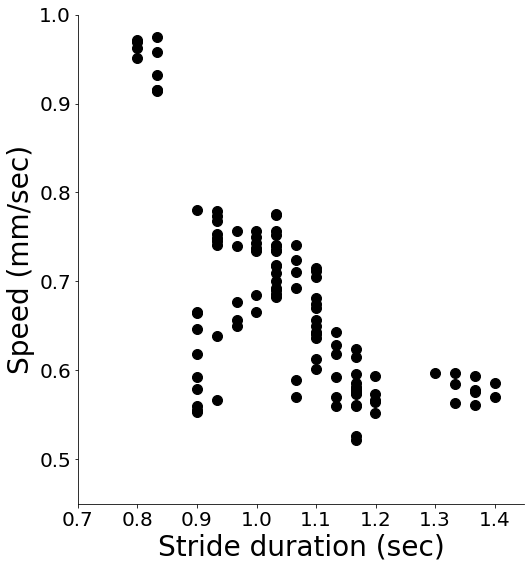

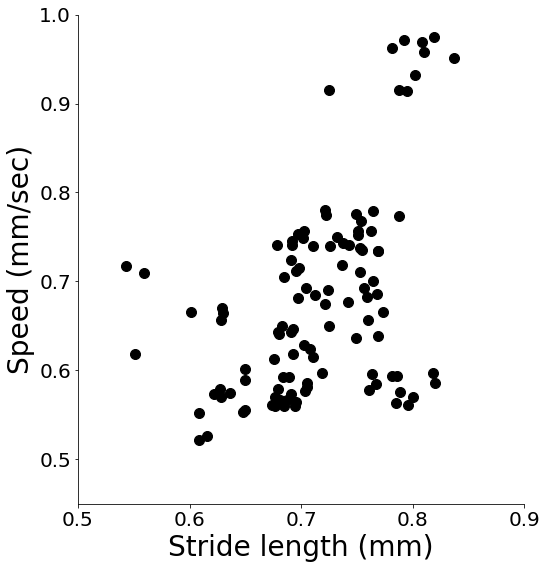

In [120]:
import matplotlib.pyplot as plt

dst_path = "C:/Users/h1006/Documents/Research/Sun/Images/"

speed = speed_all.reshape(11*10)
duration = stride_duration_all.reshape(11*10)
length = stride_length_all.reshape(11*10)

plt.figure(figsize = (8,9))
ax = plt.gca()
plt.plot(duration, speed, 'o', color = "k", markersize = 10)
plt.xlim([0.7, 1.45])
plt.ylim([0.45, 1.0])
plt.xlabel("Stride duration (sec)", fontsize = 28)
plt.ylabel("Speed (mm/sec)", fontsize = 28)
plt.xticks([0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4],fontsize = 20)
plt.yticks([0.5,0.6,0.7,0.8,0.9,1.0], fontsize = 20)
ax.spines["top"].set_color("none")
ax.spines["right"].set_color("none")
plt.savefig(dst_path + "Speed_vs_stride_duration_201120.png", bbox_inches = "tight", facecolor="white")
plt.show()
plt.close()

plt.figure(figsize = (8,9))
ax = plt.gca()
plt.plot(length, speed, 'o', color = "k", markersize = 10)
plt.xlim([0.5, 0.9])
plt.ylim([0.45, 1.0])
plt.xlabel("Stride length (mm)", fontsize = 28)
plt.ylabel("Speed (mm/sec)", fontsize = 28)
plt.xticks([0.5,0.6,0.7,0.8,0.9], fontsize = 20)
plt.yticks([0.5,0.6,0.7,0.8,0.9,1.0], fontsize = 20)
ax.spines["top"].set_color("none")
ax.spines["right"].set_color("none")
plt.savefig(dst_path + "Speed_vs_stride_length_201120.png", bbox_inches = "tight", facecolor="white")
plt.show()
plt.close()

In [51]:
import pandas as pd

speed_series = pd.Series(speed)
duration_series = pd.Series(duration)
length_series = pd.Series(length)

Corr_duration = speed_series.corr(duration_series)
Corr_length = speed_series.corr(length_series)

print("Correlation speed vs duration:", Corr_duration)
print("Correlation speed vs length:", Corr_length)

Correlation speed vs duration: -0.6965493143889503
Correlation speed vs length: 0.46108346419600316


In [81]:
# Calculate maximum and minimum segment length
# seg_len_all: file_id, seg_id, frame [time, length]; 11 x 9 x frames x 2
# seg_len_range_all: file_id, seg_id, peak/valley, point number: 11 x 9 x 2 x point number

import pickle

with open(src_path + "pickle/seg_len_range_all_201104.pickle", "rb") as f1:
    seg_len_range_all = pickle.load(f1)
with open(src_path + "pickle/seg_len_all_201102.pickle", "rb") as f2:
    seg_len_all = pickle.load(f2)

In [83]:
file_id = 0
seg_id = 4

dat = seg_len_range_all[file_id][seg_id]
seg_max = dat[0][1].max()
seg_min = dat[1][1].min()
print("seg_len_range_all[file_id][seg_Id]:", dat)
print("dat[0][1].max():", dat[0][1].max())
print("dat[1][1].min():", dat[1][1].min())

seg_len_range_all[file_id][seg_Id]: [[array([1.16655]), array([0.40902885])], [array([0.6666 , 1.69983]), array([0.19407685, 0.21234417])]]
dat[0][1].max(): 0.4090288544219175
dat[1][1].min(): 0.1940768519309351


In [84]:
import numpy as np

max_len_all = []
min_len_all = []

for file_id in range(len(seg_len_range_all)):
    dst_max = []
    dst_min = []
    for seg_id in range(len(seg_len_range_all[file_id])):
        dat = seg_len_range_all[file_id][seg_id]
        dst_max.append(dat[0][1].max())
        dst_min.append(dat[1][1].min())
    max_len_all.append(dst_max)
    min_len_all.append(dst_min)
max_len_all = np.array(max_len_all)
min_len_all = np.array(min_len_all)

print(max_len_all)
print(min_len_all)        
        
        
        

[[0.24612954 0.39983541 0.41606516 0.42485425 0.40902885 0.38830499
  0.37890813 0.35684893 0.37453103]
 [0.21946098 0.38907729 0.42915035 0.40868285 0.41866977 0.40230883
  0.39106389 0.395345   0.360308  ]
 [0.25090474 0.4071161  0.43442165 0.43034873 0.41831378 0.40992582
  0.38582637 0.35976147 0.34836371]
 [0.29304348 0.4296776  0.49556904 0.48661495 0.47435819 0.44510565
  0.43530369 0.41746348 0.38401554]
 [0.29448635 0.45215348 0.48001293 0.48102385 0.47306214 0.44286106
  0.42986447 0.39829252 0.40449167]
 [0.2843436  0.47029213 0.48497507 0.49114751 0.47102291 0.47266627
  0.44291683 0.44709602 0.39339547]
 [0.29365698 0.46725816 0.46814229 0.48121428 0.45565346 0.45770351
  0.42365774 0.44132293 0.3825695 ]
 [0.30186217 0.45821373 0.47712606 0.47748258 0.46469974 0.46550317
  0.44021167 0.42850584 0.38132717]
 [0.32888918 0.46955889 0.51063956 0.50049768 0.48707817 0.48492159
  0.46566349 0.45023725 0.42563956]
 [0.2877723  0.43705709 0.45789529 0.45471536 0.46874922 0.45426

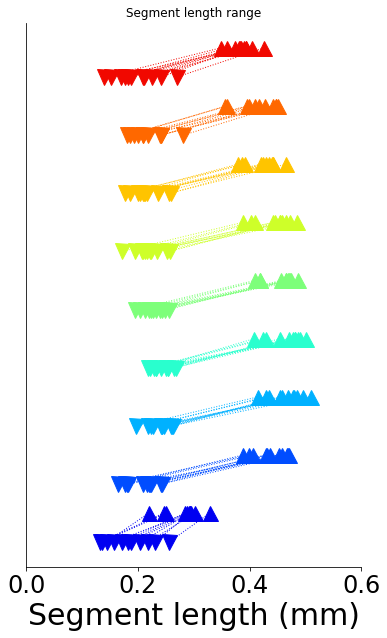

In [118]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.figure(0, figsize=(6,10))
plot_shift = 0.5

for seg in range(9):
    plt.plot(max_len_all[:,seg],[seg+plot_shift]*11, color=cm.jet((seg+1)/10), marker='^', linestyle='None', markersize=15)
    plt.plot(min_len_all[:,seg],[seg]*11, color=cm.jet((seg+1)/10), marker='v', linestyle='None', markersize=15)
    plt.plot([max_len_all[:,seg], min_len_all[:,seg]], [seg+plot_shift, seg], color=cm.jet((seg+1)/10), linewidth=1, linestyle="dotted")
    
plt.title("Segment length range")
plt.xlabel("Segment length (mm)", fontsize=30)

plt.xlim([0,0.6])
#plt.ylim([0,6])
#plt.xticks([0,1,2,3])
plt.yticks([])
plt.tick_params(labelsize=24)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
#plt.legend()
plt.savefig(dst_path + "Segment_length_range_201120.png", facecolor="white", bbox_inches = "tight")
plt.show()   

In [121]:
import pickle

with open(src_path + "pickle/max_len_all_201120.pickle", "wb") as f1:
    #pickle.dump(max_len_all, f1)
with open(src_path + "pickle/min_len_all_201120.pickle", "wb") as f2:
    #pickle.dump(min_len_all, f2)

In [122]:
# Calculate contraction duration

import pickle

with open(src_path + "pickle/seg_len_range_all_201104.pickle", "rb") as f1:
    seg_len_range_all = pickle.load(f1)
with open(src_path + "pickle/seg_len_all_201102.pickle", "rb") as f2:
    seg_len_all = pickle.load(f2)
with open(src_path + "pickle/max_len_all_201120.pickle", "rb") as f3:
    max_len_all = pickle.load(f3)
with open(src_path + "pickle/min_len_all_201120.pickle", "rb") as f4:
    min_len_all = pickle.load(f4)

In [173]:
# Check max and min in segment length data
# seg0 (A8) - seg8 (T3)
# select valleys
# Result1: 1,1,0,0,0,0,0,0,0
# Result2: 1,1,1,1,1,1,1,1,1
# Result3: 1,1,1,1,1,1,0,0,0
# Result4: 3,2,2,2,2,2,2,2,3
# Result5: 2,2,2,2,2,2,2,2,2
# Result6: 0,1,1,1,1,1,1,1,1
# Result7: 1,1,1,1,1,1,1,1,1
# Result8: 1,1,1,1,1,1,1,1,1
# Result9: 1,1,1,1,1,1,1,1,1
# Result10: 1,1,1,1,1,1,1,1,1
# Result11: 1,1,1,1,1,0,0,0,0

valleys = np.array([[1,1,0,0,0,0,0,0,1],
                    [1,1,1,1,1,1,1,1,1],
                    [1,1,1,1,1,1,0,0,1],
                    [3,2,2,2,2,2,2,2,3],
                    [2,2,2,2,2,2,2,2,2],
                    [0,1,1,1,1,1,1,1,1],
                    [1,1,1,1,1,1,1,1,1],
                    [1,1,1,1,1,1,1,1,1],
                    [1,1,1,1,1,1,1,1,1],
                    [1,1,1,1,1,1,1,1,1],
                    [1,1,1,1,1,0,0,0,0]])

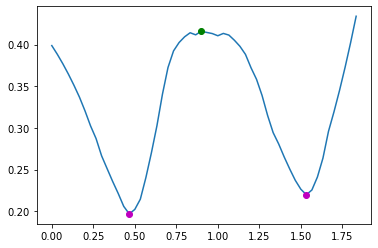

In [174]:
# Calculate contraction duration

# seg_len_all: file_id, seg_id, frame [time, length]; 11 x 9 x frames x 2
# seg_len_range_all: file_id, seg_id, peak/valley, point number: 11 x 9 x 2 x point number


import matplotlib.pyplot  as plt
from scipy import signal

file_id = 0
seg_id = 2

t = seg_len_all[file_id][seg_id][:,0]
length = signal.savgol_filter(seg_len_all[file_id][seg_id][:,1], 11, 2)
peaks = seg_len_range_all[file_id][seg_id]

plt.plot(t, length)
plt.plot(peaks[0][0], peaks[0][1], 'go')
plt.plot(peaks[1][0], peaks[1][1], 'mo')

plt.show()

[[array([0.19998]), array([0.6666])], [array([6], dtype=int64), array([20], dtype=int64)]]


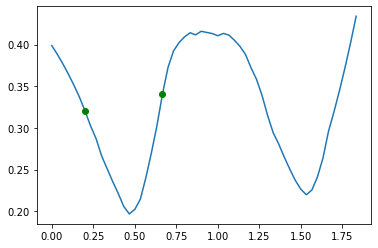

thrd: 0.3063564982604687
left side: [0.33690981] [0.32046209] [0.30245361]
right side: [0.30261456] [0.34058774] [0.37256965]


In [175]:
from scipy import signal

file_id = 0
seg_id = 2

dat_t = seg_len_all[file_id][seg_id][:,0]
dat_l = signal.savgol_filter(seg_len_all[file_id][seg_id][:,1],11,2)
valley_point = seg_len_range_all[file_id][seg_id][1][0][valleys[file_id][seg_id]]
idx = np.where(dat_t == valley_point)[0]
thrd = (max_len_all[file_id][seg_id] - min_len_all[file_id][seg_id])*0.5 + min_len_all[file_id][seg_id]

# search for left idx
left_ = 0
while(dat_l[idx-left_]<thrd):
    left_ += 1
idx_left = idx - left_

# search for right idx
right_ = 0
while(dat_l[idx+right_]<thrd):
    right_ += 1
idx_right = idx + right_

time_left = dat_t[idx_left]
time_right = dat_t[idx_right]

dst0 = [[time_left, time_right], [idx_left, idx_right]]

print(dst0)
plt.plot(dat_t, dat_l)
plt.plot(dat_t[idx_left], dat_l[idx_left], "go")
plt.plot(dat_t[idx_right], dat_l[idx_right], "go")
plt.show()

print("thrd:", thrd)
print("left side:", dat_l[idx_left-1], dat_l[idx_left], dat_l[idx_left+1])
print("right side:", dat_l[idx_right-1], dat_l[idx_right], dat_l[idx_right+1])

In [176]:
# Calculate contraction duration

from scipy import signal

FWHM_segment_length_all = []

for file_id in range(11):
    dst = []
    for seg_id in range(9):

        dat_t = seg_len_all[file_id][seg_id][:,0]
        dat_l = signal.savgol_filter(seg_len_all[file_id][seg_id][:,1],11,2)
        valley_point = seg_len_range_all[file_id][seg_id][1][0][valleys[file_id][seg_id]]
        idx = np.where(dat_t == valley_point)[0]
        thrd = (max_len_all[file_id][seg_id] - min_len_all[file_id][seg_id])*0.5 + min_len_all[file_id][seg_id]

        # search for left idx
        left_ = 0
        while(dat_l[idx-left_]<thrd):
            left_ += 1
        idx_left = idx - left_

        # search for right idx
        right_ = 0
        while(dat_l[idx+right_]<thrd):
            right_ += 1
        idx_right = idx + right_

        time_left = dat_t[idx_left]
        time_right = dat_t[idx_right]

        dst0 = [[time_left[0], time_right[0]], [int(idx_left[0]), int(idx_right[0])]]

        dst.append(dst0)
    FWHM_segment_length_all.append(dst)
FWHM_segment_length_all = np.array(FWHM_segment_length_all)

In [177]:
FWHM_segment_length_all.shape

(11, 9, 2, 2)

In [179]:
contraction_duration_all = []
for file_id in range(11):
    dst = []
    for seg_id in range(9):
        dat = FWHM_segment_length_all[file_id][seg_id]
        dst.append(dat[0,1] - dat[0,0])
    contraction_duration_all.append(dst)
contraction_duration_all = np.array(contraction_duration_all)
print("contraction_duration_all", contraction_duration_all)

contraction_duration_all [[0.36663 0.36663 0.46662 0.46662 0.43329 0.36663 0.43329 0.43329 0.49995]
 [0.36663 0.39996 0.46662 0.39996 0.43329 0.39996 0.36663 0.46662 0.46662]
 [0.49995 0.46662 0.53328 0.46662 0.39996 0.43329 0.39996 0.39996 0.39996]
 [0.26664 0.43329 0.39996 0.43329 0.39996 0.36663 0.39996 0.43329 0.3333 ]
 [0.3333  0.43329 0.43329 0.43329 0.39996 0.39996 0.36663 0.39996 0.39996]
 [0.3333  0.56661 0.53328 0.49995 0.49995 0.46662 0.36663 0.43329 0.49995]
 [0.43329 0.39996 0.39996 0.43329 0.43329 0.39996 0.36663 0.49995 0.53328]
 [0.59994 0.46662 0.46662 0.49995 0.36663 0.3333  0.36663 0.43329 0.43329]
 [0.56661 0.46662 0.53328 0.53328 0.43329 0.43329 0.39996 0.36663 0.46662]
 [0.43329 0.43329 0.49995 0.43329 0.46662 0.39996 0.36663 0.43329 0.39996]
 [0.53328 0.49995 0.49995 0.43329 0.46662 0.39996 0.36663 0.46662 0.46662]]


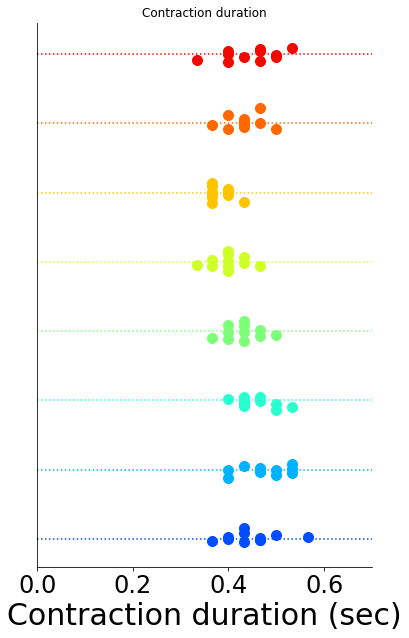

In [193]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.figure(0, figsize=(6,10))
plot_shift = 0.5

for seg in range(1,9):
    plt.plot(contraction_duration_all[:,seg], np.array([seg-1]*11) + np.random.randn(11)*0.07, color=cm.jet((seg+1)/10), 
             marker='o', linestyle='None', markersize=10)
    plt.plot([0,0.7], [seg-1, seg-1], color=cm.jet((seg+1)/10), linestyle='dotted')
    
plt.title("Contraction duration")
plt.xlabel("Contraction duration (sec)", fontsize=30)

plt.xlim([0,0.7])
#plt.ylim([0,6])
plt.xticks([0,0.2, 0.4, 0.6])
plt.yticks([])
plt.tick_params(labelsize=24)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
#plt.legend()
plt.savefig(dst_path + "Contraction_duration_201120.png", facecolor="white", bbox_inches = "tight")
plt.show()   